# Lab Rotation - Nuno Martinho (1)

#### Database input and curation

In [83]:
# Inputs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import molvs
from molvs import Standardizer
from molvs import fragment
from molvs import charge
from molvs import tautomer
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric, GetScaffoldForMol
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.rdinchi import InchiToInchiKey, MolToInchi
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdFMCS
from rdkit.Chem.Draw import DrawingOptions
from IPython.display import SVG
from rdkit.Chem.PandasTools import AddMoleculeColumnToFrame
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [84]:
# Import database: delimited by ";" 

data = pd.read_csv("Database.csv", encoding='iso-8859-1', delimiter=";")

In [85]:
# Adding a column of actives (1) and inactives (0) - according to its value (>50)

data.loc[data["IC50 (µM)"] == ">50", 'Active/Inactive'] = 0
data.loc[data["IC50 (µM)"] != ">50", 'Active/Inactive'] = 1

In [86]:
# Standardization of SMILES

def standardize_molecules(smiles_list):
    unsalt = molvs.fragment.LargestFragmentChooser()
    s = Standardizer()
    u = molvs.charge.Uncharger()
    t = molvs.tautomer.TautomerCanonicalizer()
    std_smi = []
    inchik = []
    for smi in smiles_list:
        m = Chem.MolFromSmiles(smi)
        # step 1: sanitize, disconect metals, normalise chemotypes, reionise acids
        m = s.standardize(m)
        # step 2: disconect salts
        m = unsalt(m)
        # step 3: neutralise
        m = u.uncharge(m)
        inchik.append(Chem.MolToInchiKey(m))
        std_smi.append(Chem.MolToSmiles(m))
    return(inchik, std_smi)

In [87]:
# Applying to this database

inchikey,std_mols = standardize_molecules(data["SMILES"])

# Adding to my dataframe

data["InChIKeys"] = inchikey
data["Standardized SMILES"] = std_mols

#Saving this data

data.to_csv('Database_curated.csv', index=False)

data.shape

(35, 7)

In [88]:
data

,Name,Structure,SMILES,IC50 (µM),Active/Inactive,InChIKeys,Standardized SMILES
0,1,Imagem,C[C@@H](C1=CC=C2C=C(C=CC2=C1)OC)C(=O)N[C@@H](C...,20.7,1.0,ATRZWHYIEWLEMV-HZTQYWCDSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)[C@@H](C)...
1,a1,Imagem,CC(C)C(=O)N[C@@H](CC1=CSC=C1)C(=O)NC(C2=CC=C(C...,>50,0.0,GOKAEQAWUMBNSK-ZZHFZYNASA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)C(C)C)c2c...
2,a2,Imagem,CC(=O)OC1=CC=C(C=C1)C(=O)N[C@@H](CC2=CSC=C2)C(...,>50,0.0,AXWTXKBKCWHMOR-NPHAVVRNSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)c2ccc(OC(...
3,a3,Imagem,COC1=CC=C(C(=C1)OC)C(C2=CC=C(C=C2)OCC(=O)O)NC(...,>50,0.0,NYFJPMRNXTZLCI-QUWDGAPNSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)c2c[nH]c3...
4,a4,Imagem,CN1CCN(CC1)CC2=CC=C(C=C2)C(=O)N[C@@H](CC3=CSC=...,>50,0.0,WDZKAQRZFFAFMW-GYXLRUHFSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)c2ccc(CN3...
5,a5,Imagem,COC1=CC=C(C=C1)C2CC2C(=O)N[C@@H](CC3=CSC=C3)C(...,>50,0.0,BYCBSYHHWIITFN-QYMCTRHBSA-N,COc1ccc(C2CC2C(=O)N[C@@H](Cc2ccsc2)C(=O)NC(c2c...
6,a6,Imagem,COC1=CC2=CC=C(C=C2C=C1)C(=O)N[C@@H](CC3=CSC=C3...,11.8,1.0,CVSUOEPJGQYDTK-PTYUOYDSSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)c2ccc3cc(...
7,a7,Imagem,COC1=CC2=C(C=C1)C=C(C=C2)/C=C/C(=O)N[C@@H](CC3...,3.9,1.0,IYBCBYMTTDCPJQ-REZAJOPUSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)/C=C/c2cc...
8,a8,Imagem,COC1=CC(=CC=C1)/C=C/C(=O)N[C@@H](CC2=CSC=C2)C(...,21.8,1.0,FMSXGBRZCSTJRH-RBOZEPCLSA-N,COc1cccc(/C=C/C(=O)N[C@@H](Cc2ccsc2)C(=O)NC(c2...
9,a9,Imagem,COC1=CC=C(C(=C1)OC)C(C2=CC=C(C=C2)OCC(=O)O)NC(...,23,1.0,JZLOHSYAOKERIB-RNWYOQHESA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)Cc2ccc3c(...


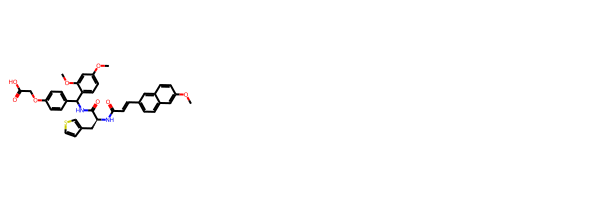

In [89]:
# Confirming my molecule - a7

mols = [Chem.MolFromSmiles(smiles) for smiles in data["Standardized SMILES"].values]
Draw.MolsToGridImage(mols[7:8])

In [90]:
# Calculation of Morgan Fingerprints

morgan = []

for smiles in data["Standardized SMILES"]:
    mol = Chem.MolFromSmiles(smiles)
    morgan.append(AllChem.GetMorganFingerprintAsBitVect(mol, useChirality=True, radius=2, nBits = 1024))
    

# Verify if it has the same number of rows as our dataframe

print(len(morgan))

# Add it on our dataframe and save it as csv

data["Morgan Fingerprints"] = morgan

data.to_csv('Database_curated_WithMorgan.csv', index=False)

35


In [91]:
data["Morgan Fingerprints"]

0     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
1     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
2     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...
3     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
4     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
5     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
6     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
7     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
8     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
9     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...
10    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...
11    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
14    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
15    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
16    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
17    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
# Put it as numpy arrays

fingerprints_array = np.array(data["Morgan Fingerprints"].tolist())
smilescodes_array = np.array(data["Standardized SMILES"].tolist())
activity_array = np.array(data["Active/Inactive"].tolist())

# Save the NumPy arrays to .npy files
np.save('Morgan_Fingerprints.npy', fingerprints_array)
np.save('Standardized_SMILES.npy', smilescodes_array)
np.save('Activity.npy', activity_array)